In [18]:
import random
import time
import tracemalloc
import matplotlib.pyplot as plt
from random import sample

In [19]:
def interpolationSearch(A, x):
 
    # search space is `A[left…right]`
    (left, right) = (0, len(A) - 1)
 
    while A[right] != A[left] and A[left] <= x <= A[right]:
 
        # estimate mid
        pos = left + (x - A[left]) * (right - left) // (A[right] - A[left])
 
        # key is found
        if x == A[pos]:
            return pos
 
        # discard all elements in the right search space,
        # including the middle element
        elif x < A[pos]:
            right = pos - 1
 
        # discard all elements in the left search space,
        # including the middle element
        else:
            left = pos + 1
 
    # if the key is found
    if x == A[left]:
        return left
 
    # `x` doesn't exist in the list
    return -1
#--------------------------------------------------------------------
def jumpSearch( arr , x , n ):
     
    # Finding block size to be jumped
    step = math.sqrt(n)
     
    # Finding the block where element is
    # present (if it is present)
    prev = 0
    while arr[int(min(step, n)-1)] < x:
        prev = step
        step += math.sqrt(n)
        if prev >= n:
            return -1
     
    # Doing a linear search for x in
    # block beginning with prev.
    while arr[int(prev)] < x:
        prev += 1
         
        # If we reached next block or end
        # of array, element is not present.
        if prev == min(step, n):
            return -1
     
    # If element is found
    if arr[int(prev)] == x:
        return prev
     
    return -1

#-----------------------------------------------------
# For best case
def measure_best(seq,number):
    start = time.time()
    tracemalloc.start()
    subset = sample(seq, number)
    interpolationSearch(subset,subset[number//2])
    end = time.time()
    runtimeInter = end - start
    current, peakI = tracemalloc.get_traced_memory()
    usageInter = current / 10**6
    print("Using interpolation search: ")
    print(f"Best case memory usage is: {usageInter} MB; Peak was {peakI / 10**6} MB")
    print(f"Best case runtime is: {runtimeInter} sec")
    start = time.time()
    tracemalloc.start()
    subset = sample(seq, number)
    interpolationSearch(subset,subset[number//2])
    end = time.time()
    runtimeJump = end - start
    current, peakJ = tracemalloc.get_traced_memory()
    usageJump = current / 10**6
    print("Using jump search: ")
    print(f"Best case memory usage is: {usageJump} MB; Peak was {peakJ / 10**6} MB")
    print(f"Best case runtime is: {runtimeJump} sec")
    return runtimeInter, peakI, runtimeJump, peakJ

# For average case
def measure_average(seq,number):
    start = time.time()
    tracemalloc.start()
    subset = sample(seq, number)
    interpolationSearch(subset,subset[50])
    end = time.time()
    runtimeInter = end - start
    current, peakI = tracemalloc.get_traced_memory()
    usageInter = current / 10**6
    print("Using interpolation search: ")
    print(f"Average case memory usage is: {usageInter} MB; Peak was {peakI / 10**6} MB")
    print(f"Average case runtime is: {runtimeInter} sec")
    start = time.time()
    tracemalloc.start()
    subset = sample(seq, number)
    interpolationSearch(subset,subset[50])
    end = time.time()
    runtimeJump = end - start
    current, peakJ = tracemalloc.get_traced_memory()
    usageJump = current / 10**6
    print("Using jump search: ")
    print(f"Average case memory usage is: {usageJump} MB; Peak was {peakJ / 10**6} MB")
    print(f"Average case runtime is: {runtimeJump} sec")
    return runtimeInter, peakI, runtimeJump, peakJ

# For worst case
def measure_worst(seq,number):
    start = time.time()
    tracemalloc.start()
    subset = sample(seq, number)
    interpolationSearch(subset,subset[number-1])
    end = time.time()
    runtimeInter = end - start
    current, peakI = tracemalloc.get_traced_memory()
    usageInter = current / 10**6
    print("Using interpolation search: ")
    print(f"Worst case memory usage is: {usageInter} MB; Peak was {peakI / 10**6} MB")
    print(f"Worst case runtime is: {runtimeInter} sec")
    start = time.time()
    tracemalloc.start()
    subset = sample(seq, number)
    interpolationSearch(subset,subset[number-1])
    end = time.time()
    runtimeJump = end - start
    current, peakJ = tracemalloc.get_traced_memory()
    usageJump = current / 10**6
    print("Using jump search: ")
    print(f"Worst case memory usage is: {usageJump} MB; Peak was {peakJ / 10**6} MB")
    print(f"Worst case runtime is: {runtimeJump} sec")
    return runtimeInter, peakI, runtimeJump, peakJ

In [20]:
random.seed(1)
sequence = [i for i in range(100000)]
seqRange = [100,500,1000,5000,10000,50000,100000]
bestCase = []
averageCase = []
worstCase = []
for i in range(7):
     print(f"{i+1}: for {seqRange[i]} items\n --------------------")
     bestCase.append(measure_best(sequence,seqRange[i]))
     averageCase.append(measure_average(sequence,seqRange[i]))
     worstCase.append(measure_worst(sequence,seqRange[i]))
print(bestCase)
print(averageCase)
print(worstCase)

1: for 100 items
 --------------------
Using interpolation search: 
Best case memory usage is: 28.836752 MB; Peak was 31.152103 MB
Best case runtime is: 0.0009930133819580078 sec
Using jump search: 
Best case memory usage is: 28.838383 MB; Peak was 31.152103 MB
Best case runtime is: 0.0 sec
Using interpolation search: 
Average case memory usage is: 28.8399 MB; Peak was 31.152103 MB
Average case runtime is: 0.0 sec
Using jump search: 
Average case memory usage is: 28.841493 MB; Peak was 31.152103 MB
Average case runtime is: 0.000995635986328125 sec
Using interpolation search: 
Worst case memory usage is: 28.843033 MB; Peak was 31.152103 MB
Worst case runtime is: 0.0 sec
Using jump search: 
Worst case memory usage is: 28.844288 MB; Peak was 31.152103 MB
Worst case runtime is: 0.0009984970092773438 sec
2: for 500 items
 --------------------
Using interpolation search: 
Best case memory usage is: 28.849544 MB; Peak was 31.152103 MB
Best case runtime is: 0.000997304916381836 sec
Using jump 

In [21]:
best_inter_runtime, best_inter_usage, best_jump_runtime, best_jump_usage = map(list, zip(*bestCase))
average_inter_runtime, average_inter_usage, average_jump_runtime, average_jump_usage = map(list, zip(*averageCase))
worst_inter_runtime, worst_inter_usage, worst_jump_runtime, worst_jump_usage = map(list, zip(*worstCase))

Text(0.5, 1.0, 'Interpolation search runtime')

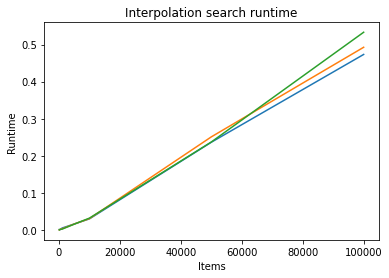

In [24]:
fig, ax = plt.subplots()  
ax.plot(seqRange, best_inter_runtime, label='Best')  
ax.plot(seqRange, average_inter_runtime, label='Average')  
ax.plot(seqRange, worst_inter_runtime, label='Worst')  
ax.set_xlabel('Items')  
ax.set_ylabel('Runtime')  
ax.set_title("Interpolation search runtime")  

Text(0.5, 1.0, 'Interpolation search usage')

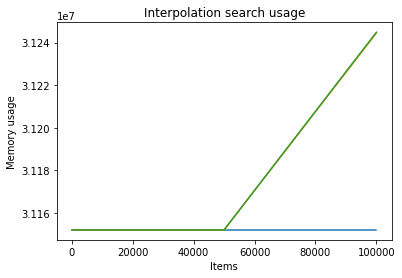

In [25]:
fig, ax = plt.subplots()  
ax.plot(seqRange, best_inter_usage, label='Best')  
ax.plot(seqRange, average_inter_usage, label='Average')  
ax.plot(seqRange, worst_inter_usage, label='Worst')  
ax.set_xlabel('Items')  
ax.set_ylabel('Memory usage')  
ax.set_title("Interpolation search usage")  

Text(0.5, 1.0, 'Jump search runtime')

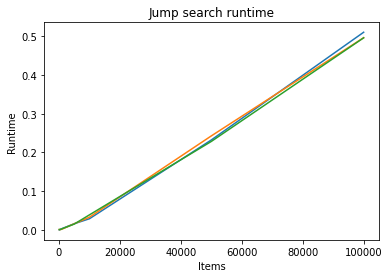

In [28]:
fig, ax = plt.subplots()  
ax.plot(seqRange, best_jump_runtime, label='Best')  
ax.plot(seqRange, average_jump_runtime, label='Average')  
ax.plot(seqRange, worst_jump_runtime, label='Worst')  
ax.set_xlabel('Items')  
ax.set_ylabel('Runtime')  
ax.set_title("Jump search runtime")  

Text(0.5, 1.0, 'Jump search usage')

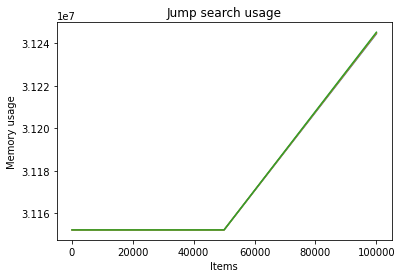

In [29]:
fig, ax = plt.subplots()  
ax.plot(seqRange, best_jump_usage, label='Best')  
ax.plot(seqRange, average_jump_usage, label='Average')  
ax.plot(seqRange, worst_jump_usage, label='Worst')  
ax.set_xlabel('Items')  
ax.set_ylabel('Memory usage')  
ax.set_title("Jump search usage")  